<a href="https://colab.research.google.com/github/PriyanshuMahor/Machine-Learning-Models/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries:

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

###1. Data Collection:

In [45]:
df = pd.read_csv('breast_cancer_wisconsin.csv')
df.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


###2. Data preprocessing:
* Data Cleaning:

In [46]:
# Dropping the 'Sample_code_number' column
df.drop('Sample_code_number', axis=1, inplace=True)

In [47]:
# Handling Missing Values
medianValue = df['Bare_Nuclei'].median()
df['Bare_Nuclei'] = df['Bare_Nuclei'].fillna(medianValue)


In [48]:
#df.to_csv('preprocessed_breast_cancer_data.csv', index=False)
df['Bare_Nuclei'] = df['Bare_Nuclei'].astype(int)

#Map Target class labels
df['Class'] = df['Class'].map({2:'Benign', 4:'Malignant'})

df.info()
df['Class'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_Thickness              699 non-null    int64 
 1   Uniformity_of_Cell_Size      699 non-null    int64 
 2   Uniformity_of_Cell_Shape     699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    int64 
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    object
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


,count
Class,
Benign,458
Malignant,241


In [49]:
df.describe()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


###3. EDA:

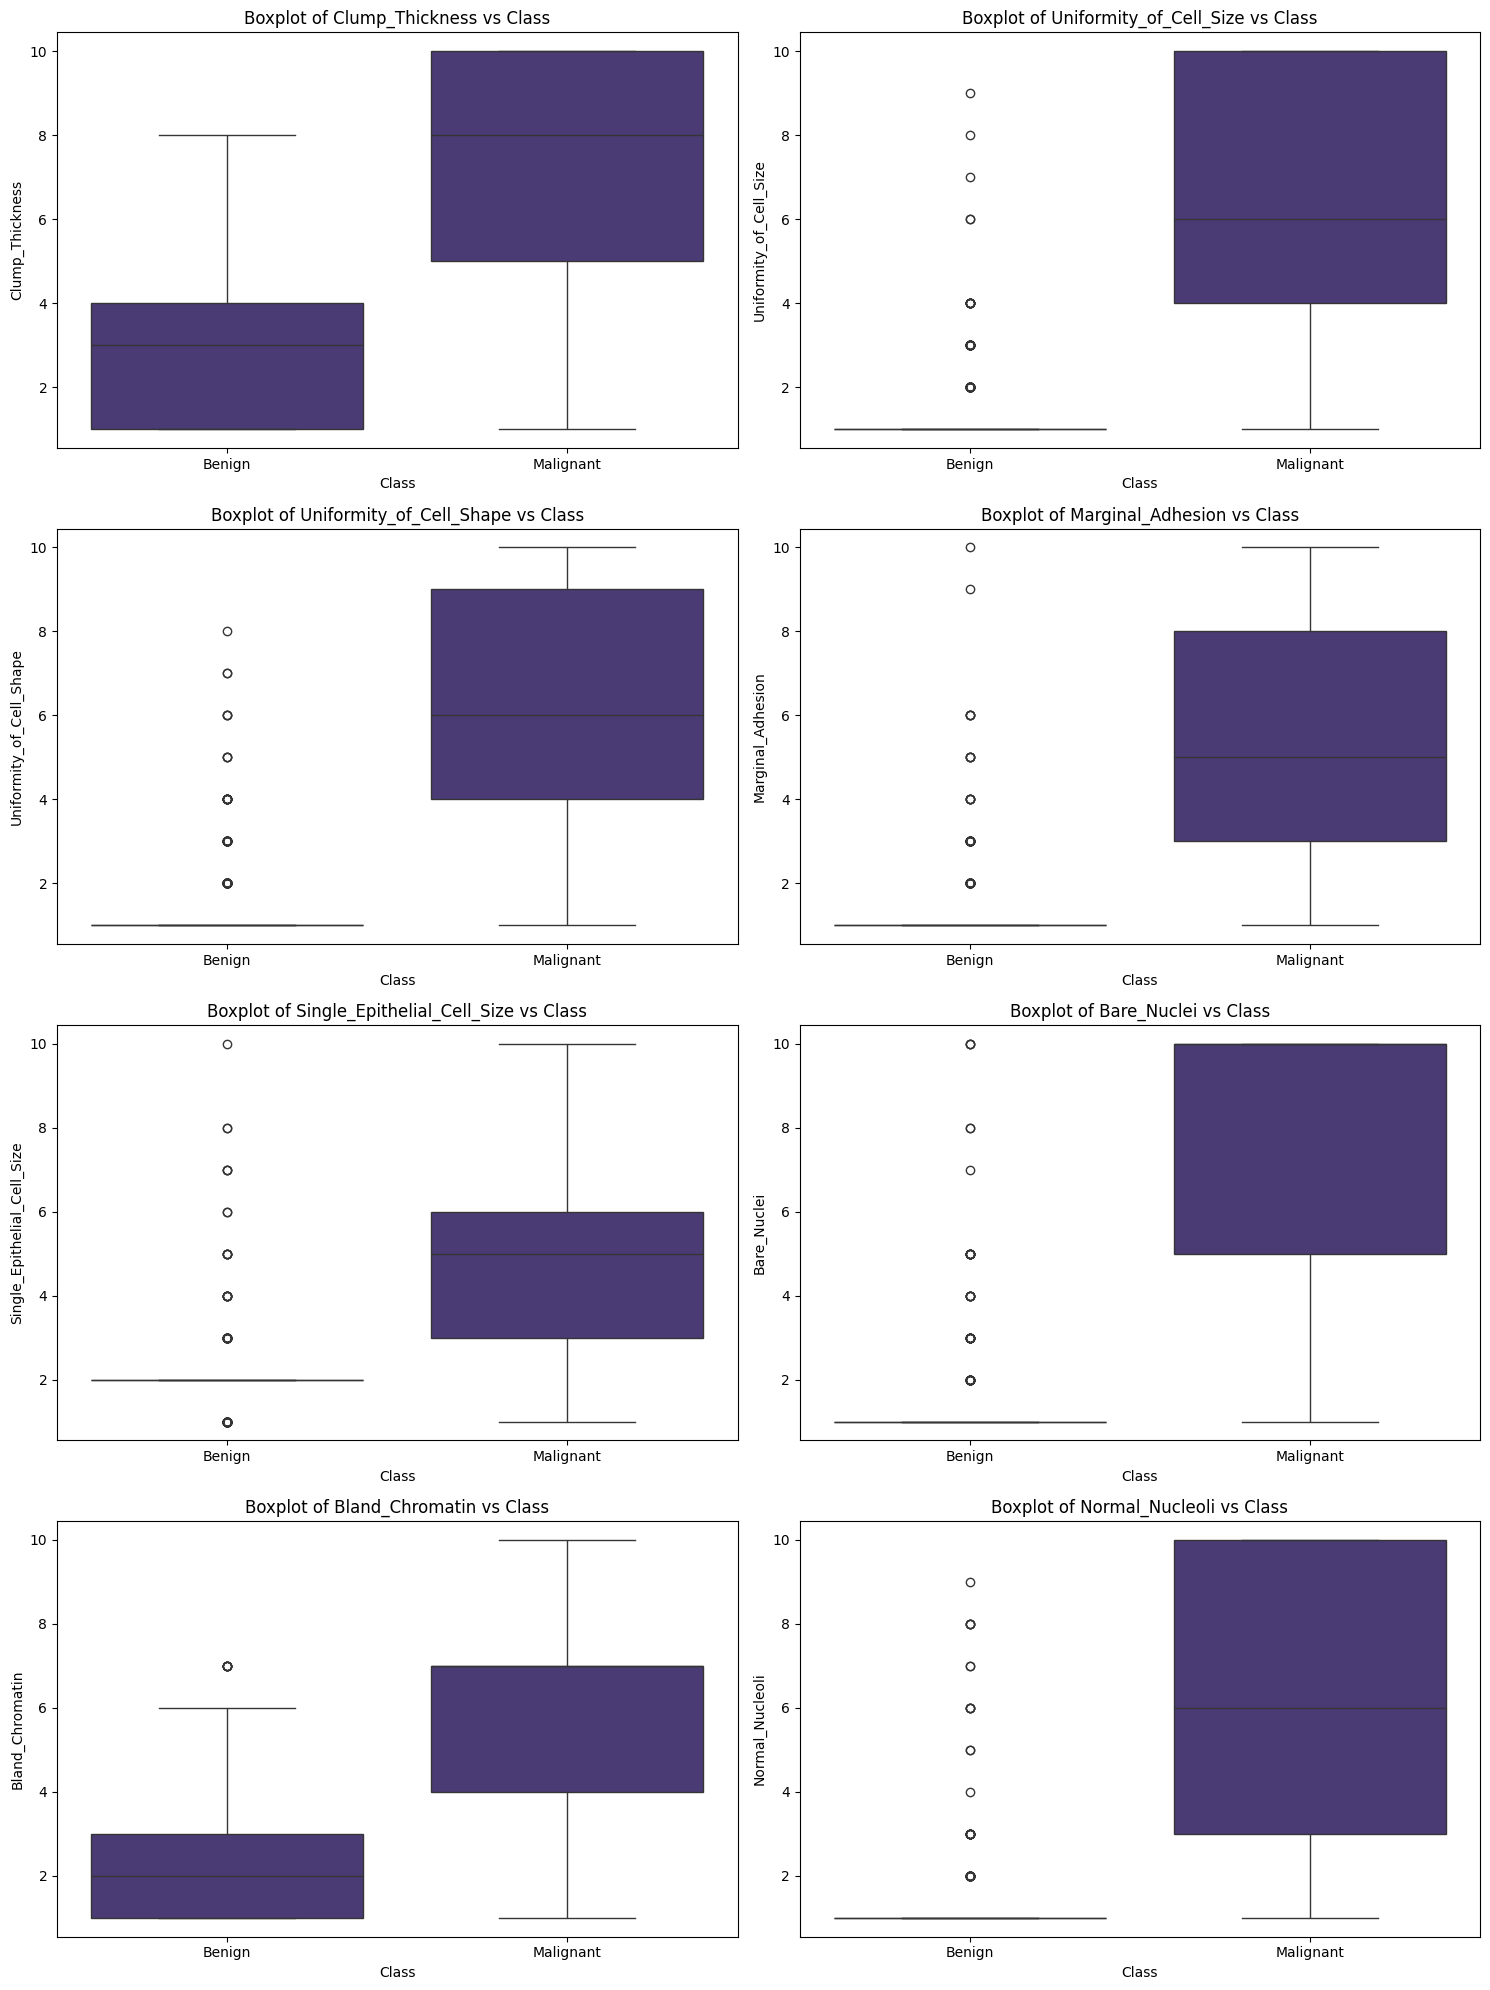

In [50]:
sns.set_palette('viridis')
features = df.columns[:-1]

#Creating boxplot
fig, axes = plt.subplots(nrows= 4, ncols = 2, figsize=(15,20))
axes = axes.flatten()

for i, col in enumerate(features):
  if col != 'Mitoses':
    sns.boxplot(x = 'Class', y = col, data = df, ax = axes[i])
    axes[i].set_title(f'Boxplot of {col} vs Class')
plt.tight_layout()
plt.show()

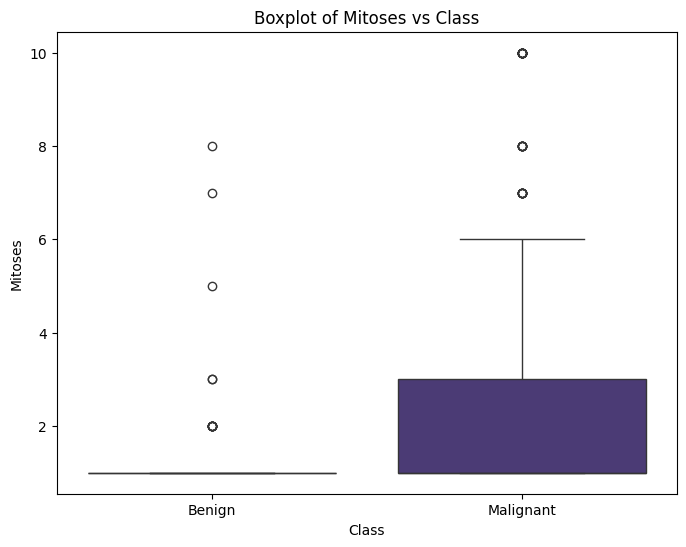

In [51]:
#Plot for Mitosis
plt.figure(figsize=(8,6))
sns.boxplot(x = 'Class', y= 'Mitoses', data = df)
plt.title("Boxplot of Mitoses vs Class")
plt.show()

- The box plots clearly show a pattern: for most features, the median values are significantly higher for malignant cases compared to benign cases. This suggests that these features are strong predictors of the cancer type. Features like `Clump_Thickness`, `Uniformity_of_Cell_Size`, and `Bare_Nuclei` show the most pronounced separation between the two classes, while `Mitoses` shows less of a distinction.

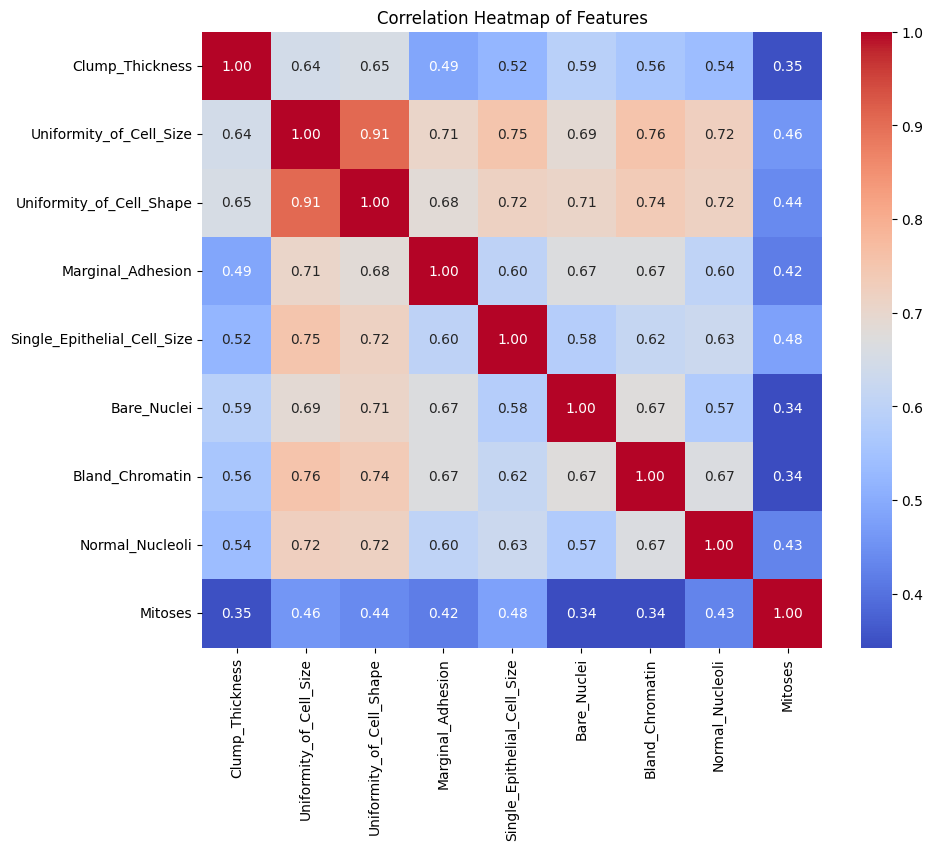

In [52]:
#Creating Correlation Heatmap
plt.figure(figsize=(10,8))
cor_matrix = df.drop('Class',axis=1).corr()
sns.heatmap(cor_matrix, annot= True, cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap of Features")
plt.show()

- The correlation heatmap reveals several strong positive correlations among the features, particularly:\n",
    "* **Uniformity of Cell Size** and **Uniformity of Cell Shape** are highly correlated (`0.91`), which makes intuitive sense as the size and shape of cells are often related.\n",
    "* **Clump Thickness**, **Uniformity of Cell Size**, **Uniformity of Cell Shape**, and **Bare Nuclei** show high correlations with each other, suggesting they capture similar aspects of the cell morphology. This indicates potential **multicollinearity** among the features, which is an important consideration for more advanced modeling.

#Model Training:

In [53]:
#Feature Selection
#Defining Feature X and Target Y
X = df.drop('Class', axis = 1)
Y = df['Class']

selected_features = ['Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape', 'Bare_Nuclei','Clump_Thickness']
X_selected = X[selected_features]

In [54]:
#Training

X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size = 0.2, random_state = 42)
print(f"Training set siz: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")

Training set siz: 559 rows
Test set size: 140 rows


In [55]:
#Modeling
model = GaussianNB()
model.fit(X_train, Y_train)

#Prediction
y_pred = model.predict(X_test)

In [56]:
#Model Evaluation

print(f"Accuracy Score: {accuracy_score(Y_test, y_pred):.4f}")
print(f"Confusion Matrix: {confusion_matrix(Y_test,y_pred)}")
print(f"Classification Report: {classification_report(Y_test,y_pred)}")

Accuracy Score: 0.9643
Confusion Matrix: [[92  3]
 [ 2 43]]
Classification Report:               precision    recall  f1-score   support

      Benign       0.98      0.97      0.97        95
   Malignant       0.93      0.96      0.95        45

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

